# CS 4661 Project
## Random Forest Regression on Stock Data
Members: Nshan Kazaryan, Bailey Canham, Ly Jacky Nhiayi, Asahel Monroy

Random Forest Regression is a machine learning algorithm that uses the ensemble (multiple algorithms for better results) method for regression. We will use this method on the stock data for AAL (American Airlines Group Inc.)

The code below imports the needed tools for reading the stock data and making a dataframe.

In [348]:
# import necessary tools
import numpy as np
import pandas as pd
import datetime as dt
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

# read csv file, show data
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
stock_df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


Now we will prepare the data by removing all other stock information besides AAL.

We will also produce new columns for the past 100, 50, 30, and 7 entries average for each day, and remove the open, high, low, and volume columns. The reason for doing so is that when we predict future stock data, we will not have access to data such as the open, high, and low, so instead we use the average close of the past days.

In [349]:
# remove other stock data
aal_df = stock_df[0:1259]

# remove unused columns
aal_df.pop("open")
aal_df.pop("low")
aal_df.pop("high")
aal_df.pop("volume")

# add past 100, 50, 30, weekly avg
aal_df.insert(0, "weekly_avg", " ")
aal_df.insert(0, "30_entry_avg", " ")
aal_df.insert(0, "50_entry_avg", " ")
aal_df.insert(0, "100_entry_avg", " ")

# see result
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
0,,,,,2013-02-08,14.75,AAL
1,,,,,2013-02-11,14.46,AAL
2,,,,,2013-02-12,14.27,AAL
3,,,,,2013-02-13,14.66,AAL
4,,,,,2013-02-14,13.99,AAL
...,...,...,...,...,...,...,...
1254,,,,,2018-02-01,53.88,AAL
1255,,,,,2018-02-02,52.10,AAL
1256,,,,,2018-02-05,49.76,AAL
1257,,,,,2018-02-06,51.18,AAL


Next, we will caluclate the past entry averages using for loops and populate the new columns.

In [350]:
# get rid of warnings
pd.options.mode.chained_assignment = None

# for loops to calculate avg for each column
for x in range(14, 1259):
    aal_df["weekly_avg"][x] = aal_df["close"][x-14:x-7].mean()

for x in range(37, 1259):
    aal_df["30_entry_avg"][x] = aal_df["close"][x-30-7:x-7].mean()

for x in range(57, 1259):
    aal_df["50_entry_avg"][x] = aal_df["close"][x-50-7:x-7].mean()

for x in range(107, 1259):
    aal_df["100_entry_avg"][x] = aal_df["close"][x-100-7:x-7].mean()

# remove entries w/no data, see result
aal_df = aal_df[107:1259]
aal_df

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,close,Name
107,16.2605,17.2224,17.116,16.388571,2013-07-15,17.76,AAL
108,16.2805,17.2314,17.076,16.477143,2013-07-16,17.95,AAL
109,16.3043,17.2392,17.039667,16.531429,2013-07-17,18.45,AAL
110,16.331,17.2536,16.998,16.641429,2013-07-18,18.42,AAL
111,16.358,17.269,16.969667,16.791429,2013-07-19,18.23,AAL
...,...,...,...,...,...,...,...
1254,49.6466,51.1978,53.305667,57.932857,2018-02-01,53.88,AAL
1255,49.7839,51.4362,53.552667,58.2,2018-02-02,52.10,AAL
1256,49.8886,51.6166,53.678333,57.674286,2018-02-05,49.76,AAL
1257,49.9717,51.7612,53.736667,56.97,2018-02-06,51.18,AAL


Now, we want to have an idea of how the close data looks. Making a plot helps visualize the trends.

<function matplotlib.pyplot.show(close=None, block=None)>

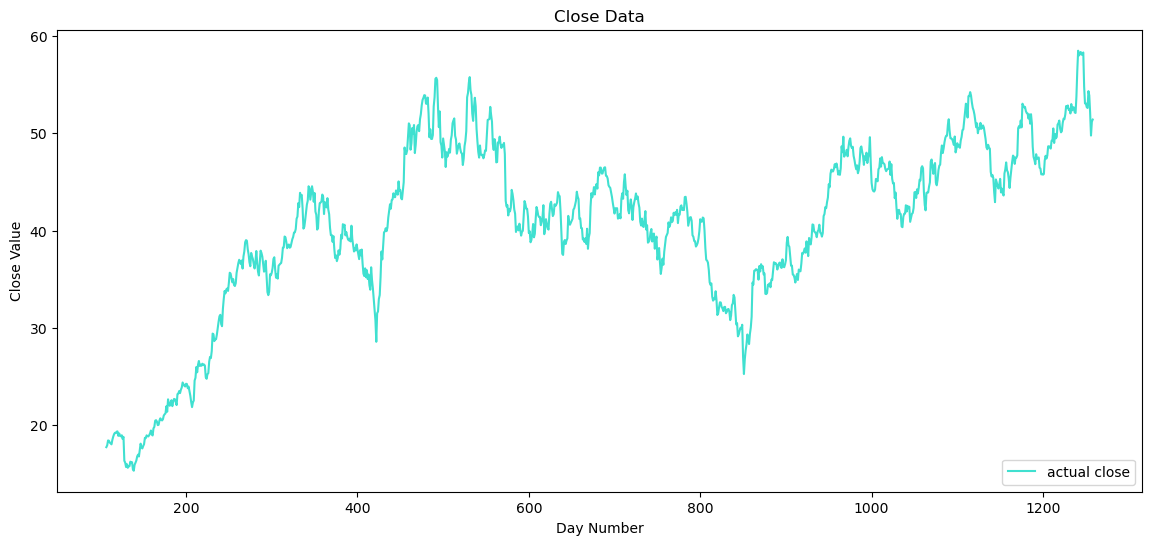

In [351]:
# setting up graph
%matplotlib inline
plt.figure(figsize=(14,6))

# plotting the data
plt.plot(aal_df.close, label='actual close', color='turquoise')

# making labels, title, legend
plt.xlabel('Day Number')
plt.ylabel('Close Value')
plt.title('Close Data')
plt.legend(loc="lower right")

# show graph
plt.show

After having visualized the data, we are now ready to use machine learning on our prepared data. The method we will be using is Random Forest Regression, which in simple terms is a bunch of linear regression algorithms working together. 

First we will split the data we now have into training and testing sets. Then, we will train the data with our Random Forest Regressor and predict values using the testing set.

In [352]:
# import necessary tools
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestRegressor
import math

# split dataset for training and testing
feature_cols = ["100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
X = scale(aal_df[feature_cols])
y = aal_df["close"]

# split into training and testing sets
s_f = .67
n_train = math.floor(s_f * X.shape[0])
n_test = math.ceil((1-s_f) * X.shape[0])

X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]

# create algorithm object
rfr = RandomForestRegressor(n_estimators=361, random_state=2, bootstrap=True)

# train with sets
rfr.fit(X_train, y_train)

# predict values from manual test split
y_predict = rfr.predict(X_test)
print(y_predict)

[34.30560886 35.38001274 35.59418172 35.68455568 35.73119003 35.88603712
 35.37889141 35.75470803 35.71071911 35.81653657 35.87631468 35.88564986
 35.80013712 35.89287812 35.86515125 35.80686842 35.84749114 35.93575983
 35.53080055 36.1355928  36.06965014 36.06640748 36.02680831 36.05320748
 36.23858116 36.29579778 36.25633712 36.29558975 36.29556233 36.40492521
 36.42830499 36.48719945 36.97947258 36.79936177 36.70506814 36.97958366
 36.98407119 36.90130055 36.93274072 36.41315568 36.39848809 36.00265845
 35.96088587 35.98204931 35.97357285 35.96235402 35.9650133  36.0151795
 35.82706288 36.40901607 36.34625873 36.20024571 36.41986011 36.94213158
 36.83861357 37.32044238 37.42697978 38.8568554  39.13297729 40.47193906
 40.64950139 41.35457064 41.68628809 41.32844875 41.78288089 41.89
 41.91432133 41.66551247 41.27786704 41.2798892  41.33204986 41.42348753
 41.4457867  41.34448199 41.18801662 41.3397036  41.43375069 42.07233518
 42.50190859 42.88373934 42.48445789 42.61552853 45.745132

Now that we have trained our model and calculated predictions, we can evaluate the accuracy of these predictions with the RMSE (Root Mean Squared Error).

In [353]:
# import necessary tool
from sklearn import metrics

# calculating "Mean Square Error" (MSE)
mse = metrics.mean_squared_error(y_test, y_predict)

# using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

3.5078548379975873


Given that the close values are in the tens (30, 40, 50, etc.), an RMSE value of 3.5078 shows that the predictions are close to the actual values. In other words, the results of the Random Forest Regression algorithm produced accurate results.

To visualize this, we will now plot the test close values with the predicted close values.

<function matplotlib.pyplot.show(close=None, block=None)>

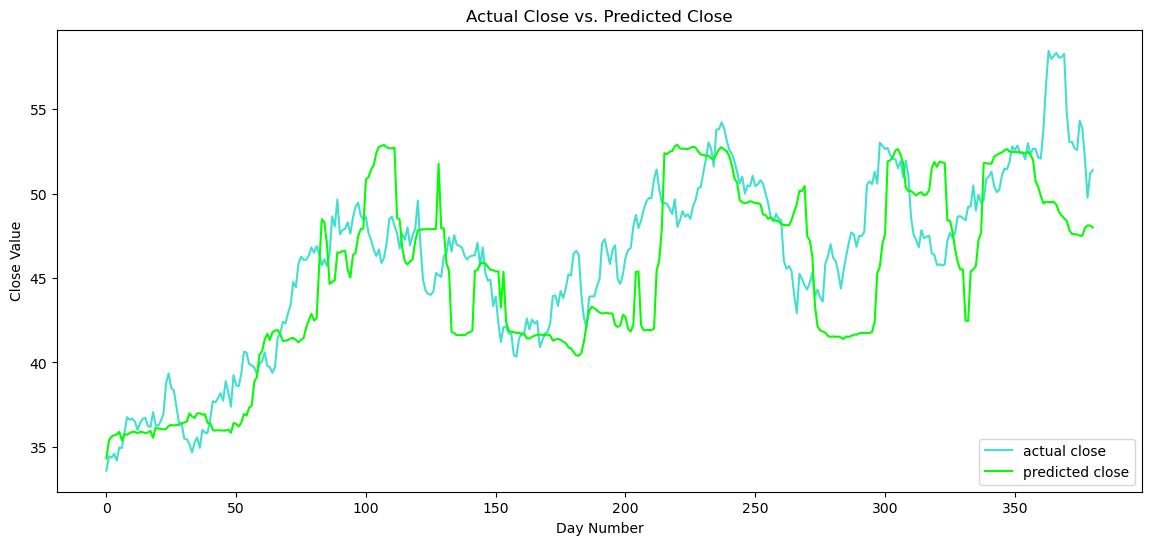

In [354]:
# reset index because predicted values don't have date tied to them
y_test = y_test.reset_index(drop=True)

# setting up graph
%matplotlib inline
plt.figure(figsize=(14,6))

# plotting the data
plt.plot(y_test, label="actual close", color="turquoise")
plt.plot(y_predict, label="predicted close", color="lime")

# making labels, title, legend
plt.xlabel('Day Number')
plt.ylabel('Close Value')
plt.title('Actual Close vs. Predicted Close')
plt.legend(loc="lower right")

# show graph
plt.show

As we can see, the Random Forest Regression ensemble method was able to closely follow the shape of the actual close data. Keep in mind that the train test split used was by date and not random (first .67 were training, last .3 entries were testing). This was done so that we would be able to view predictions in chronological order instead of random entries.

If we had used the train_test_split method, we would have had more accurate predictions because that method gets entries randomly for its split, so the training data would have had some information on values with the latest dates.

Still, considering the scale on the y-axis, the predicted close values are near the actual values. It can be said that this model can be used to accurately predict more volatile stocks to some degree. 